In [1]:
#import all the required dependencies/packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#load the data 
df = pd.read_csv("C:\\Users\\USER\\Downloads\\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
x = df.drop(columns = ['CustomerID','Gender','Age']).values

In [7]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [13]:
#choosing the number of clusters
#wcss ---> within cluster sum of squares/ elbow method

wcss = []

for i in range(1,11):
    kmeans =  KMeans(n_clusters = i, init ='k-means++',random_state =42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


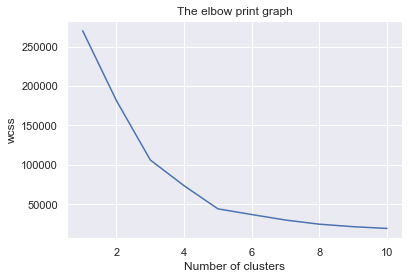

In [14]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow print graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

#we can notice the drop in the graph ranges(3,5) those dropping points are called elbow points 
## optimum number of cluster = 5

In [15]:
# training the k_means clustering model

k_means = KMeans(n_clusters = 5, init ='k-means++',random_state = 0)

#return a label for each  data point based on their clusters
y = kmeans.fit_predict(x)
print(y)

[8 7 3 7 8 7 3 7 3 7 3 7 3 7 3 7 8 7 8 7 8 7 3 7 3 7 8 0 8 7 3 7 3 7 3 7 3
 7 8 7 8 7 8 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 4 1 4 1 4 9 4 9 4 1 4 9 4 9 4 9 4 9 4 1 4 9 4 1 4
 1 4 9 4 9 4 9 4 9 4 9 4 1 4 9 4 1 4 9 4 1 4 9 4 9 4 9 4 9 4 9 4 1 2 6 2 1
 2 6 2 6 2 6 2 6 2 6 2 6 2 6 2]


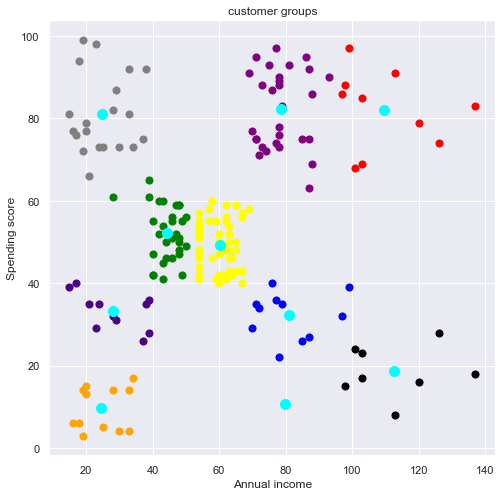

In [22]:
# visualizing all the clusters
plt.figure(figsize =(8,8))
plt.scatter(x[y==0,0],x[y==0,1], s=50,c='green',label = 'cluster1')
plt.scatter(x[y==1,0],x[y==1,1], s=50,c='blue',label = 'cluster2')
plt.scatter(x[y==2,0],x[y==2,1], s=50,c='red',label = 'cluster3')
plt.scatter(x[y==3,0],x[y==3,1], s=50,c='orange',label = 'cluster4')
plt.scatter(x[y==4,0],x[y==4,1], s=50,c='purple',label = 'cluster5')
plt.scatter(x[y==5,0],x[y==5,1], s=50,c='yellow',label = 'cluster6')
plt.scatter(x[y==6,0],x[y==6,1], s=50,c='black',label = 'cluster7')
plt.scatter(x[y==7,0],x[y==7,1], s=50,c='grey',label = 'cluster8')
plt.scatter(x[y==8,0],x[y==8,1], s=50,c='indigo',label = 'cluster9')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c = 'cyan',label = 'centroids')
plt.title('customer groups')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.show()